# AIAB Paper 2

# The Task

Write a report that examines the effects of mutation rate, crossover probability, tournament size or any other parameter of the GA, on performance. To make this study meaningful you might need to use genotypes bigger that the ones presented in the lab sheet (e.g. try a genotype with 30-50 genes). 

  - Minimal required  technical achievements:
    - A plot of tournaments versus fitness (where this is the fitness of the best individual in the population).
    - A plot of how the fitness of the best individual after X number of tournaments (choose an appropriate X)  changes with  a GA parameter of your choice (e.g mutations rate).  Make sure you average over several runs and indicate both the mean and spread (standard error in the mean) of your value.

# Solving the Task

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from google.colab import files

!mkdir figs

mkdir: cannot create directory ‘figs’: File exists


## Methods

In [ ]:
def generate_vol_ben_max(n=30, start=1, stop=10):
  volumes, benefits = np.empty(n), np.empty(n)

  for i in range(n):
    volumes[i] = random.randint(start, stop)
    benefits[i] = random.randint(start, stop)

  total_ben = benefits.sum()
  max_volume = round((total_ben  / 2) - ((total_ben / 10)*3) + 3)

  return max_volume, volumes, benefits

In [ ]:
def generate_population(pop_size, individual_size):
  return np.random.choice([0, 1], (pop_size, individual_size))

In [ ]:
def fitness_function(gene, benefits, volumes, max_volume):
  v = 0
  b = 0
  fitness = int(0)
  for i in range(gene.shape[0]):
    if gene[i]:
      b += benefits[i]
      v += volumes[i]
  if v > max_volume:
    fitness = b * 0.01
  else:
    fitness = b
  return fitness

In [ ]:
def get_best_gene(gene_pop, fitness):
    return gene_pop[np.argmax(fitness)]

In [ ]:
def get_population_fitness(genos, pop_size, benefits, volumes, max_volume):
  fitnesses = np.empty(pop_size)
  for i, g in enumerate(genos):
    fitnesses[i] = fitness_function(g, benefits, volumes, max_volume)
  
  return fitnesses

In [ ]:
def crossover_function(gene_one, gene_two, p_crossover=0.01):
  for i, bit in enumerate(gene_one):
    if np.random.rand() < p_crossover:
      gene_two[i] = bit
  
  return gene_two

In [ ]:
def mutation_function(gene, p_mutate=0.15):
  g = gene.copy()
  for i, bit in enumerate(g):
    if np.random.rand() < p_mutate:
      g[i] = 0 if bit == 1 else 1
  
  return g

In [ ]:
def demes_tourney_select(pop_size, fitnesses, window=3):
  contestant_one = np.random.choice(range(pop_size))
  contestant_two = (contestant_one + np.random.choice(range(1, window + 1))) % pop_size 
  return [contestant_one, contestant_two] if fitnesses[contestant_one] >= fitnesses[contestant_two] else [contestant_two, contestant_one]

### Main Loop


In [ ]:
epochs, pop_size, individual_size, mutation_amount = 500, 25, 40, 20
max_volume, volumes, benefits = generate_vol_ben_max(individual_size)

print('Max Volume:', max_volume, '\n')
print('Volumes:', volumes, '\n')
print('Benefits:', benefits, '\n')

Max Volume: 50 

Volumes: [ 7.  1.  6.  8.  5.  8. 10.  3.  9.  3.  3. 10.  8.  7.  2.  2.  7.  5.
 10.  2.  2.  4.  9.  3.  4.  9.  5.  2.  6.  3. 10.  3.  6.  1.  8.  4.
 10.  6.  6.  9.] 

Benefits: [ 8.  4.  6.  6.  2. 10.  4. 10.  8.  3.  6.  5. 10.  8.  2.  9.  3.  6.
  9. 10.  2.  8.  9.  3.  7.  6.  4.  8.  5.  9.  4.  1.  5.  3.  4.  4.
  8.  9.  7.  1.] 



In [ ]:
window, p_crossover, p_mutate = 3, 0.01, 0.15

genos = generate_population(pop_size, individual_size)
geno_fitnesses = np.zeros((pop_size, epochs))
current_fitnesses = get_population_fitness(genos, pop_size, benefits, volumes, max_volume)

for epoch in range(epochs):
  for gene in range(pop_size):
    winner_id, loser_id = demes_tourney_select(pop_size, current_fitnesses, window=window) 

    crossover_loser = crossover_function(genos[winner_id].copy(), genos[loser_id].copy(), p_crossover=p_crossover) 
    mutated_loser = mutation_function(crossover_loser, p_mutate=p_mutate) 

    genos[loser_id] = mutated_loser
    current_fitnesses[loser_id] = fitness_function(mutated_loser, benefits, volumes, max_volume)
  
  geno_fitnesses[:, epoch] = current_fitnesses

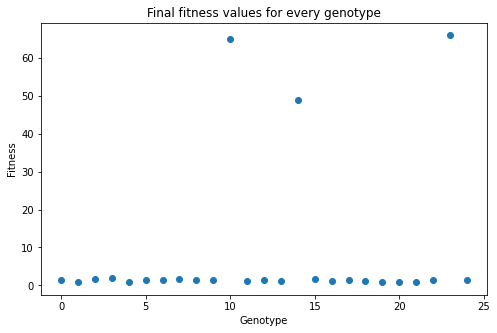

In [ ]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.scatter(range(0, pop_size), current_fitnesses)
plt.title("Final fitness values for every genotype")
plt.xlabel('Genotype')
plt.ylabel('Fitness')
plt.savefig('figs/final-fitness-geneotype.png', pad_inches=0.1, bbox_inches='tight')
plt.show()

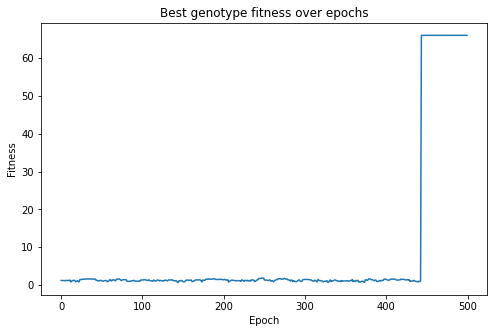

In [ ]:
plt.plot(range(0, epochs), geno_fitnesses[np.argmax(current_fitnesses)])
plt.title("Best genotype fitness over epochs")
plt.xlabel('Epoch')
plt.ylabel('Fitness')
plt.savefig('figs/final-fitness-best-evolve.png', pad_inches=0.1, bbox_inches='tight')
plt.show()

## Statistics

Write a report that examines the effects of mutation rate, crossover Write a report that examines the effects of mutation rate, crossover probability, tournament size or any other parameter of the GA, on performance. To make this study meaningful you might need to use genotypes bigger that the ones presented in the lab sheet (e.g. try a genotype with 30-50 genes). 

  - Minimal required  technical achievements:
    - A plot of tournaments versus fitness (where this is the fitness of the best individual in the population).
    - A plot of how the fitness of the best individual after X number of tournaments (choose an appropriate X)  changes with  a GA parameter of your choice (e.g mutations rate).  Make sure you average over several runs and indicate both the mean and spread (standard error in the mean) of your value.


#### A plot of tournaments versus fitness (where this is the fitness of the best individual in the population).

In [ ]:
window, p_crossover, p_mutate = 3, 0.01, 0.15
arr = [[], [], [], [], []]

for i in range(5):
  genos = generate_population(pop_size, individual_size)
  geno_fitnesses = np.zeros((pop_size, epochs))
  current_fitnesses = get_population_fitness(genos, pop_size, benefits, volumes, max_volume)
  for epoch in range(epochs):
    for gene in range(pop_size):
      winner_id, loser_id = demes_tourney_select(pop_size, current_fitnesses, window=window)

      crossover_loser = crossover_function(genos[winner_id].copy(), genos[loser_id].copy(), p_crossover=p_crossover) 
      mutated_loser = mutation_function(crossover_loser, p_mutate=p_mutate) 

      genos[loser_id] = mutated_loser
      current_fitnesses[loser_id] = fitness_function(mutated_loser, benefits, volumes, max_volume)

      arr[i].append(current_fitnesses[np.argmax(current_fitnesses)])
    
    geno_fitnesses[:, epoch] = current_fitnesses

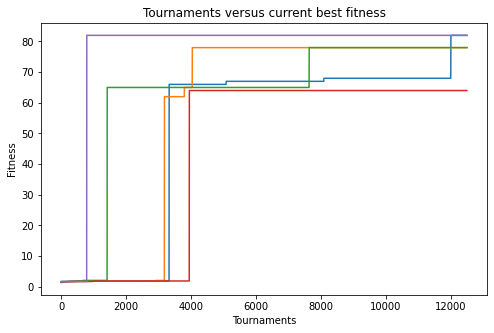

In [ ]:
for i in range(5):
  plt.plot(range(epochs * pop_size), arr[i])
plt.title('Tournaments versus current best fitness')
plt.xlabel('Tournaments')
plt.ylabel('Fitness')
plt.savefig('figs/tournaments-vs-best-fitness.png', pad_inches=0.1, bbox_inches='tight')
plt.show()

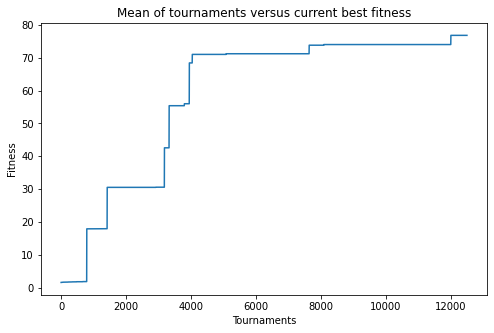

In [ ]:
new_arr = []
for j in range(epochs * pop_size):
  total = 0
  for i in range(5):
    total += arr[i][j]
  new_arr.append(total / 5)

plt.plot(range(epochs * pop_size), new_arr)
plt.title('Mean of tournaments versus current best fitness')
plt.xlabel('Tournaments')
plt.ylabel('Fitness')
plt.savefig('figs/tournaments-vs-best-fitness-mean.png', pad_inches=0.1, bbox_inches='tight')
plt.show()

#### A plot of how the fitness of the best individual after X number of tournaments (choose an appropriate X) changes with a GA parameter of your choice (e.g mutations rate). Make sure you average over several runs and indicate both the mean and spread (standard error in the mean) of your value.

In [ ]:
# Amount to mean
n = 10
epochs = 150
torney_count = epochs * pop_size
print('Amouint of torneys:', torney_count)

Amouint of torneys: 3750


##### Crossover

In [ ]:
p_crossover_list = []
for i in np.arange(0.00, 1.05, 0.05):
  p_crossover_list.append(i)

data = [[[] for i in range(n)] for i in range(len(p_crossover_list))]

for i, p_crossover in enumerate(p_crossover_list):
  window, p_mutate = 3, 0.15

  for j in range(n):
    genos = generate_population(pop_size, individual_size)
    current_fitnesses = get_population_fitness(genos, pop_size, benefits, volumes, max_volume)

    for epoch in range(epochs):
      for gene in range(pop_size):
        winner_id, loser_id = demes_tourney_select(pop_size, current_fitnesses, window=window)

        crossover_loser = crossover_function(genos[winner_id].copy(), genos[loser_id].copy(), p_crossover=p_crossover) 
        mutated_loser = mutation_function(crossover_loser, p_mutate=p_mutate) 

        genos[loser_id] = mutated_loser
        current_fitnesses[loser_id] = fitness_function(mutated_loser, benefits, volumes, max_volume)

    data[i][j] = current_fitnesses[np.argmax(current_fitnesses)]

In [ ]:
new_data = []

for i in range(len(p_crossover_list)):
  new_data.append(np.array(data[i]).mean(axis=0))

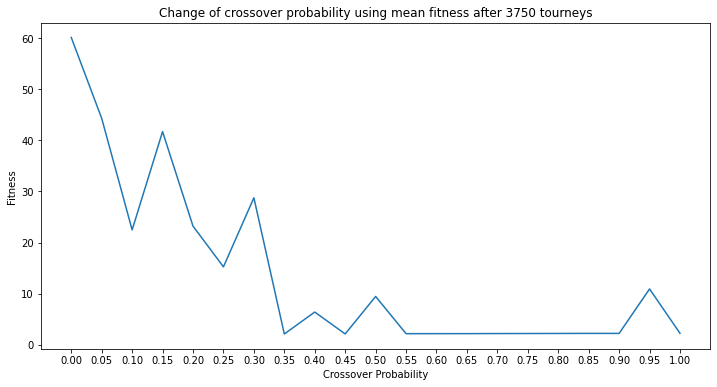

In [ ]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.plot(p_crossover_list, new_data)
plt.title('Change of crossover probability using mean fitness after %s tourneys' % (torney_count))
plt.xlabel('Crossover Probability')
plt.ylabel('Fitness')
plt.xticks(p_crossover_list)
plt.savefig('figs/crossover.png', pad_inches=0.1, bbox_inches='tight')
plt.show()

##### Mutation

In [ ]:
p_mutate_list = []
for i in np.arange(0.00, 1.05, 0.05):
  p_mutate_list.append(i)

data = [[[] for i in range(n)] for i in range(len(p_mutate_list))]

for i, p_mutate in enumerate(p_mutate_list):
  window, p_crossover = 3, 0.01

  for j in range(n):
    genos = generate_population(pop_size, individual_size)
    current_fitnesses = get_population_fitness(genos, pop_size, benefits, volumes, max_volume)

    for epoch in range(epochs):
      for gene in range(pop_size):
        winner_id, loser_id = demes_tourney_select(pop_size, current_fitnesses, window=window)

        crossover_loser = crossover_function(genos[winner_id].copy(), genos[loser_id].copy(), p_crossover=p_crossover) 
        mutated_loser = mutation_function(crossover_loser, p_mutate=p_mutate) 

        genos[loser_id] = mutated_loser
        current_fitnesses[loser_id] = fitness_function(mutated_loser, benefits, volumes, max_volume)

    data[i][j] = current_fitnesses[np.argmax(current_fitnesses)]

In [ ]:
new_data = []

for i in range(len(p_mutate_list)):
  new_data.append(np.array(data[i]).mean(axis=0))

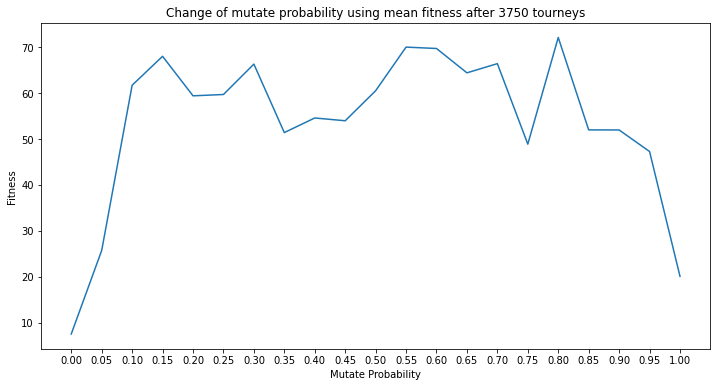

In [ ]:
plt.plot(p_mutate_list, new_data)
plt.title('Change of mutate probability using mean fitness after %s tourneys' % (torney_count))
plt.xlabel('Mutate Probability')
plt.ylabel('Fitness')
plt.xticks(p_mutate_list)
plt.savefig('figs/mutate.png', pad_inches=0.1, bbox_inches='tight')
plt.show()

##### Window

In [ ]:
p_window_list = []
for i in range(1, individual_size + 1):
  p_window_list.append(i)

data = [[[] for i in range(n)] for i in range(len(p_window_list))]

for i, window in enumerate(p_window_list):
  p_mutate, p_crossover = 0.15, 0.01

  for j in range(n):
    genos = generate_population(pop_size, individual_size)
    current_fitnesses = get_population_fitness(genos, pop_size, benefits, volumes, max_volume)

    for epoch in range(epochs):
      for gene in range(pop_size):
        winner_id, loser_id = demes_tourney_select(pop_size, current_fitnesses, window=window)

        crossover_loser = crossover_function(genos[winner_id].copy(), genos[loser_id].copy(), p_crossover=p_crossover) 
        mutated_loser = mutation_function(crossover_loser, p_mutate=p_mutate) 

        genos[loser_id] = mutated_loser
        current_fitnesses[loser_id] = fitness_function(mutated_loser, benefits, volumes, max_volume)

    data[i][j] = current_fitnesses[np.argmax(current_fitnesses)]

In [ ]:
new_data = []
for i in range(len(p_window_list)):
  new_data.append(np.array(data[i]).mean(axis=0))

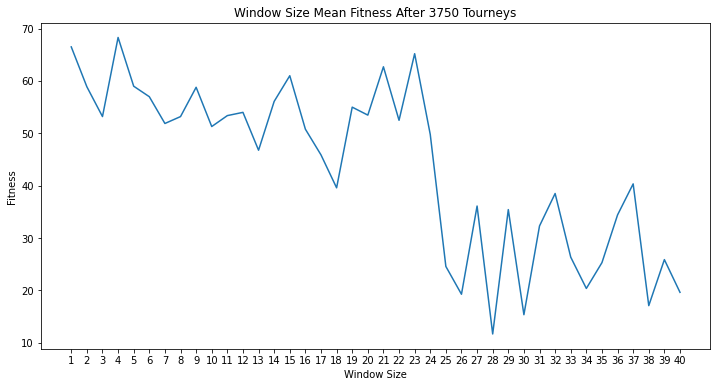

In [ ]:
plt.plot(p_window_list, new_data)
plt.title('Window Size Mean Fitness After %s Tourneys' % (torney_count))
plt.xlabel('Window Size')
plt.ylabel('Fitness')
plt.xticks(p_window_list)
plt.savefig('figs/window.png', pad_inches=0.1, bbox_inches='tight')
plt.show()

In [ ]:
!rm -rf sample_data
!rm -rf paper-2-files.zip
!zip -r /content/paper-2-files.zip /content
files.download("/content/paper-2-files.zip")

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2021.05.06/ (stored 0%)
  adding: content/.config/logs/2021.05.06/13.44.00.991142.log (deflated 54%)
  adding: content/.config/logs/2021.05.06/13.43.44.620859.log (deflated 53%)
  adding: content/.config/logs/2021.05.06/13.43.04.692209.log (deflated 91%)
  adding: content/.config/logs/2021.05.06/13.44.01.543195.log (deflated 53%)
  adding: content/.config/logs/2021.05.06/13.43.23.909017.log (deflated 54%)
  adding: content/.config/logs/2021.05.06/13.43.39.026092.log (deflated 86%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/.last_update_check.json (deflated 23%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/gce (stored 0%)
  adding: content/.config/config_sentinel (stored 0%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configuration

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>